In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import numpy as np
%matplotlib inline
mlp.style.use('seaborn')

In [7]:
files = ['ttbar','wmp','wpwm','zwpm','n2n2']

cs_pb = [1.258,24.6,1.6*1e-2,3.83*1e-2,3.99*1e-4]
cs = [i*1e3 for i in cs_pb]
k_f = [1.954,1.356,1.92,2.09,1.0]

cs_corr = {files[i] : cs[i]*k_f[i] for i in range(len(files))}

In [35]:
df = []

for f in files:
    df.append(pd.read_csv('~/Datasets/Test/' + f + '.csv'))
    df[-1]['type'] = files.index(f)

In [36]:
df[-1].head()

,ptl,etal,energyl,ptj,etaj,energyj,massj,mjj,rjj,rjl,met,n21_1,n21_2,n32_1,n32_2,infl,drfl,type
0,316.064,0.634994,381.955,570.609,-0.359310,613.448,82.7576,1323.360,2.52446,3.17310,1836.780,0.168687,0.482113,0.447682,0.527171,220.519,1.15528,4
1,507.213,-1.307170,1005.880,378.800,0.016743,386.370,75.8449,618.869,2.27652,2.49565,1039.950,0.250802,0.390995,0.362755,0.759703,910.642,1.96478,4
2,168.801,-1.672920,465.500,813.888,0.836485,1119.370,91.4546,1623.390,1.11249,2.50977,374.644,0.255746,0.271414,0.581992,0.628363,146.167,2.05721,4
3,569.750,-0.032373,570.049,878.713,-1.320300,1765.450,101.6470,1719.630,2.61836,1.35779,1028.990,0.123016,0.140020,0.642637,0.783753,685.672,3.05219,4
4,411.686,1.234320,767.194,744.934,-0.015496,750.356,89.3052,1092.250,1.03615,3.36997,578.398,0.233484,0.279186,0.579068,0.838636,798.316,1.70490,4


In [37]:
cs_corr

{'ttbar': 2458.132,
 'wmp': 33357.600000000006,
 'wpwm': 30.72,
 'zwpm': 80.04699999999998,
 'n2n2': 0.399}

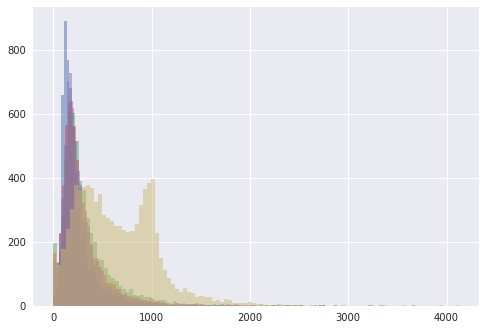

In [38]:
for f,_ in enumerate(files):
    plt.hist(df[f]['infl'],bins=100,alpha=0.5)
plt.show()

In [39]:
dtset = pd.concat(df,ignore_index=True)

In [58]:
l = np.array([])

for i,f in enumerate(files):
    l = np.append(l,np.asarray([cs_corr[f]]*len(df[i])))

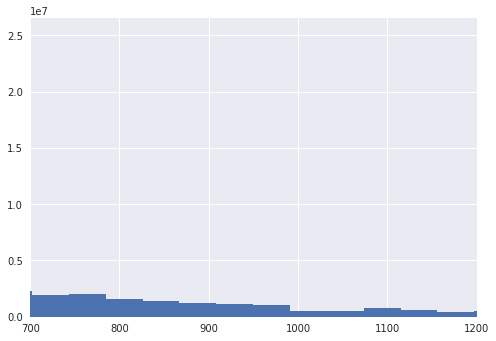

In [64]:
plt.hist(dtset['infl'],weights=l,bins=100)
plt.xlim([700,1200])
plt.show()